In [33]:
import numpy as np
from scipy.signal import periodogram
from scipy.stats import norm
from matplotlib import pyplot as plt

In [34]:
# Data to be transmitted
msg = np.random.randint(low=0, high=2, size=int(1e6))
# BPSK parameters
Eb = 0.001
fc = 100
fs = 10000
Tb = 0.001

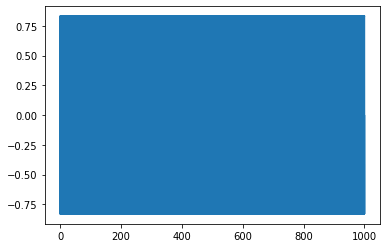

In [35]:
# PSK Transmitter
signal = []
t = np.linspace(0, Tb, int(Tb*fs))
for i in msg:
    s = np.sqrt(2*Eb/Tb)*np.sin(2*np.pi*fc*t)
    if i == 0:
        s = -s
    signal.extend(s)
t = np.linspace(0, len(msg)*Tb,int(len(msg)*Tb*fs))

fig, ax = plt.subplots()
ax.plot(t, signal)

0.00040001288869246244


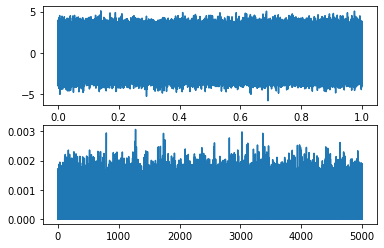

In [36]:
# Noise
ns = len(signal)
noise = np.random.normal(size=ns)

f, psd = periodogram(noise, fs)

fig, ax = plt.subplots(2,1)
ax[0].plot(noise)
ax[1].plot(f, psd)

psd_av = np.mean(psd)
N0 = 2*psd_av
signal += noise
print(N0)

In [37]:
# PSK Coherent Binary Receiver
t = np.linspace(0, Tb, int(Tb*fs))
phi = np.sqrt(2/Tb)*np.sin(2*np.pi*fc*t)
N = len(signal) // len(t)
# print(N)
signala = np.array_split(signal, N)
# print(len(signal))
received_msg = []
for i in signala:
    x = i*phi
    sm = x.sum()/fs
    if sm > 0:
        received_msg.append(1)
    else:
        received_msg.append(0)


In [38]:
msg.shape,np.array(received_msg).shape

((1000000,), (1000000,))

In [39]:
# Bit Error Probability Calculations
Pb = norm.sf(np.sqrt(2*Eb/N0))
print('Theoretical Bit Error Probability:', Pb)
Pb_pr = np.count_nonzero(msg != received_msg) / len(msg)
print('Practical Bit Error Probability:', Pb_pr)

Theoretical Bit Error Probability: 0.012674839074467113
Practical Bit Error Probability: 0.055295


10000000


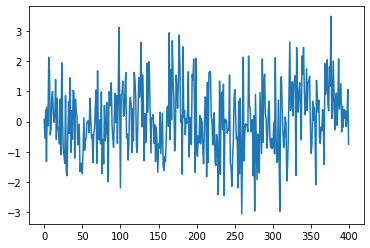

In [46]:
# PSK Coherent Binary Receiver W Filter
t = np.linspace(0, Tb, int(Tb*fs))
phi = np.sqrt(2/Tb)*np.sin(2*np.pi*fc*t)
N = len(signal) // len(t)
# print(N)
from filter1 import butter_bandpass_filter
from filter1 import butter_lowpass_filter
# filteredsig=butter_bandpass_filter(signal,[fc/2,2*fc],fs,order=5)
filteredsig=butter_lowpass_filter(signal,fs/2.01,fs,order=3)
print(len(filteredsig))
plt.plot(filteredsig[100:500])
filteredsig = np.array_split(filteredsig, N)

received_msg = []
for i in filteredsig:
    x = i*phi
    sm = x.sum()/fs
    if sm > 0:
        received_msg.append(1)
    else:
        received_msg.append(0)


In [47]:
received_msg=np.array(received_msg)
Pb = norm.sf(np.sqrt(2*Eb/N0))
print('Theoretical Bit Error Probability:', Pb)
Pb_pr = 0
for i in range(len(received_msg)):
    if int(msg[i]) != int(received_msg[i]):
        Pb_pr += 1
Pb_pr /= len(msg)
print('Practical Bit Error Probability:', Pb_pr)

Theoretical Bit Error Probability: 0.012674839074467113
Practical Bit Error Probability: 0.055483


In [48]:
received_msg.shape

(1000000,)

In [49]:
msg.shape

(1000000,)